:<CENTER>
<H1 style="color:red">
Introducción to Xarray

---

xarray nos permite trabajar con conjuntos de datos n-dimensionales y diferentes formatos de datos (netcdf, grib y geotiff)

---

</H1>
</CENTER>

# Universidad Mayor de San Andrés
##Facultad de Ciencias Puras y Naturales
###Carrera de Física
#### M.Sc. Decker Guzmán Zabalaga - Aplicaciones en Ciencias Atmósfericas usando Python
Clase 3



- Objetivos de la clase:

    1.   Conocer la biblioteca array
    2.   lea archivos netcdf usando funciones array
    3.   Calcule anomalias climatologicas ensuales y estaciones


---




References: https://towardsdatascience.com/handling-netcdf-files-using-xarray-for-absolute-beginners-111a8ab4463f


In [62]:
#Instalando xarray
!pip install xarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
#otras librerias
!!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy y shapely no son mas amigos (2020)
!pip install shapely --no-binary shapely
!pip install geopandas

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.9.1-1~focal0).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
Look

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
#cargamos 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy
import cartopy.crs as ccrs                 # para proyecciones
import cartopy.feature as cfeature         # para caracteristicas
import cartopy.io.shapereader as shpreader # para leer shapefiles
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import geopandas                           # para leer shapefiles
import xarray as xr                        # para leer netcdf

Atmosfera

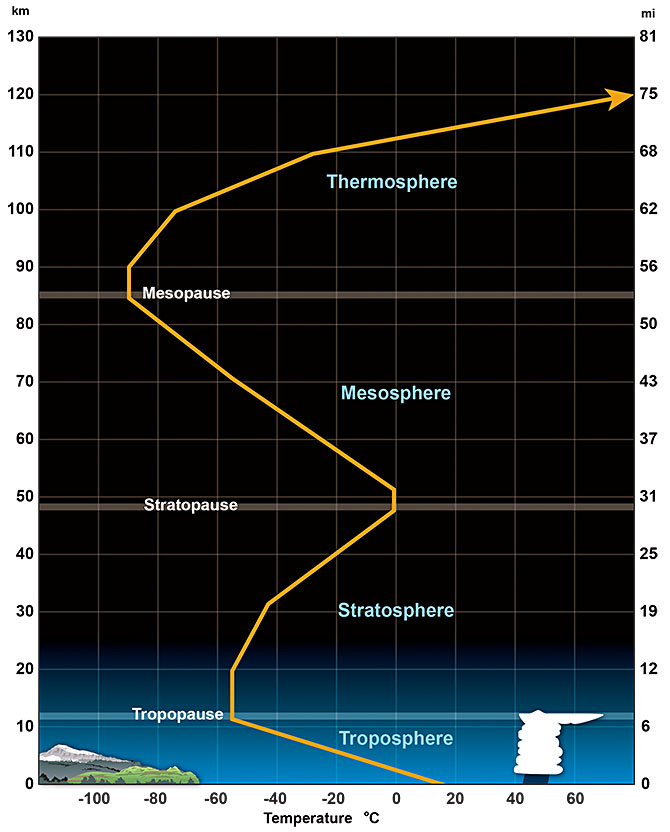

In [65]:
#Import a library to include figures from internet
from IPython.core.display import Image, display
display(Image('https://www.weather.gov/images/jetstream/atmos/atmprofile.jpg', width=300))

# Transformacion de la atmosfera en numeros 

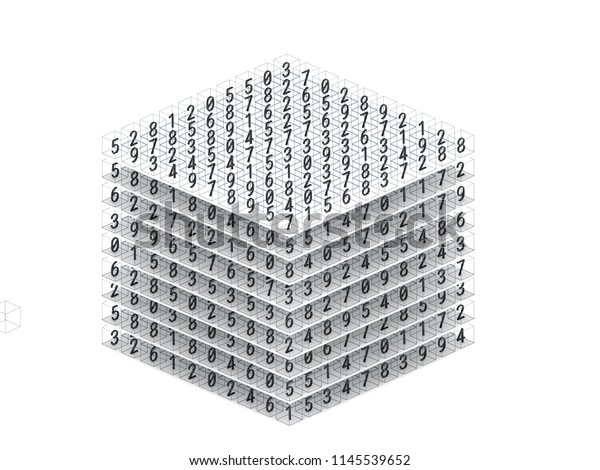

In [66]:
display(Image('https://image.shutterstock.com/image-illustration/mathematics-tensor-multidimensional-dataset-array-600w-1145539652.jpg', width=500))

Para este tutorial, acceda al reanálisis NCEP1 y descargue las medias mensuales de la temperatura del aire a 2 m.

Lo hice y puse el archivo en nuestro Google Drive con el nombre air.mon.mean.nc

https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.surface.html

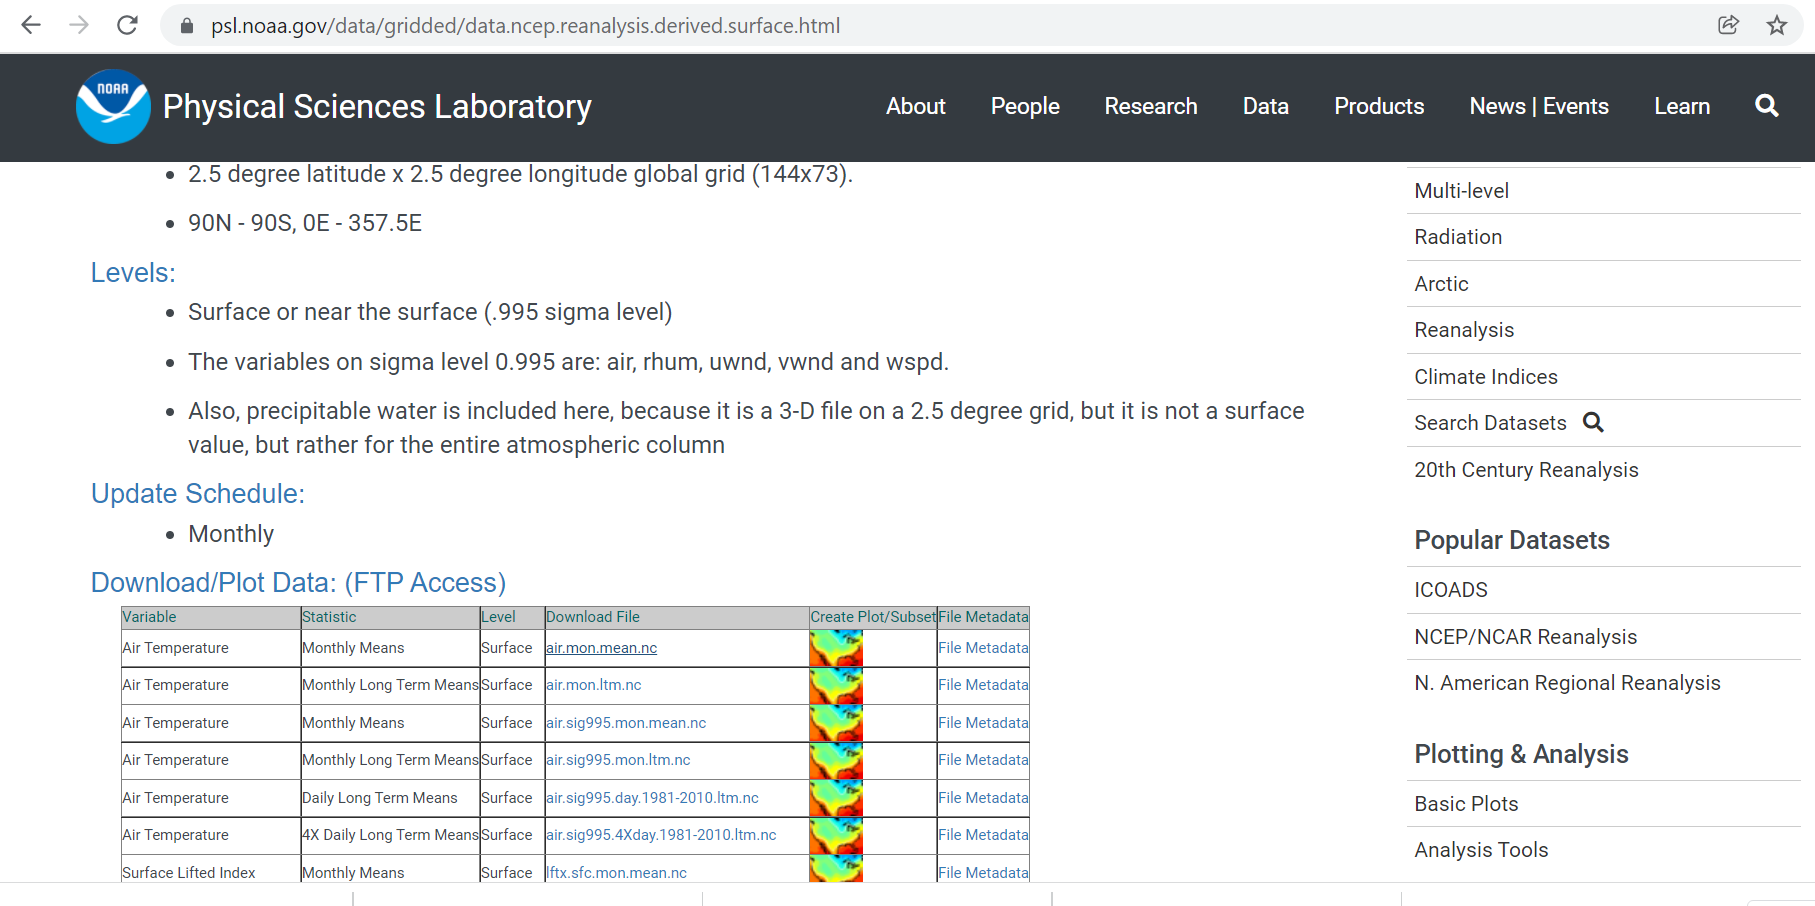

In [67]:
#Mounting Google Drive
#calling the library
from google.colab import drive
drive.mount('/content/drive/')
copied_path = '/content/drive/MyDrive/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [68]:

# load NetCDF file into variable - using xarray open dataset function
ds = xr.open_dataset(copied_path + 'air.mon.mean.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 903)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [69]:
ds["air"]

<xarray.DataArray 'air' (time: 903, lat: 73, lon: 144)>
[9492336 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01
Attributes:
    long_name:                Monthly Mean Air Temperature at sigma level 0.995
    valid_range:              [-2000.  2000.]
    units:                    degC
    precision:                1
    least_significant_digit:  0
    var_desc:                 Air Temperature
    statistic:                Mean
    parent_stat:              Individual Obs
    dataset:                  NCEP Reanalysis Derived Products
    level_desc:               0.995 sigma
    actual_range:             [-73.78001  42.14595]

In [70]:
ds.air   ## lo mismo ds["air"]

<xarray.DataArray 'air' (time: 903, lat: 73, lon: 144)>
[9492336 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01
Attributes:
    long_name:                Monthly Mean Air Temperature at sigma level 0.995
    valid_range:              [-2000.  2000.]
    units:                    degC
    precision:                1
    least_significant_digit:  0
    var_desc:                 Air Temperature
    statistic:                Mean
    parent_stat:              Individual Obs
    dataset:                  NCEP Reanalysis Derived Products
    level_desc:               0.995 sigma
    actual_range:             [-73.78001  42.14595]

In [71]:
#Dimensiones
ds.air.dims

('time', 'lat', 'lon')

In [72]:
#muestra las coordenadas de la variable
ds.air.coords

Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01

In [73]:
# Extrayendo coordenadas de la  variable (longitudes)
ds.air.lon

<xarray.DataArray 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. , 332.5, 335. , 337.5, 340. , 342.5, 345. , 347.5,
       350. , 352.5, 355. , 357.5], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:          degrees_east
    long_name:      Longitude
    actual_range:   [  0.  357.5]
    standard_name:  longitude
    axis:           X

In [74]:
# Los objetos de coordenadas admiten una notación de indexación similar
# extrayendo variables de coordenadas de .coords
ds.coords["lon"]

<xarray.DataArray 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. , 332.5, 335. , 337.5, 340. , 342.5, 345. , 347.5,
       350. , 352.5, 355. , 357.5], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:          degrees_east
    long_name:      Longitude
    actual_range:   [  0.  357.5]
    standard_name:  longitude
    axis:           X

In [75]:
type(ds)

xarray.core.dataset.Dataset

Attención!

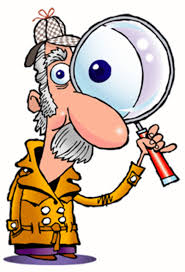

:xarray entiende los datos como un OBJETO llamado DATASET

### Pero, ¿cuál es un OBJETO?

Python trabaja con CLASES --> OBJETOS --> MÉTODOS

Pensemos en un ejemplo sencillo:

    1. los autos pueden ser nuestra clase (grupo)
    2. cada coche es un objeto (un miembro del grupo)
    3. para modificar un objeto aplicamos un método (una función)

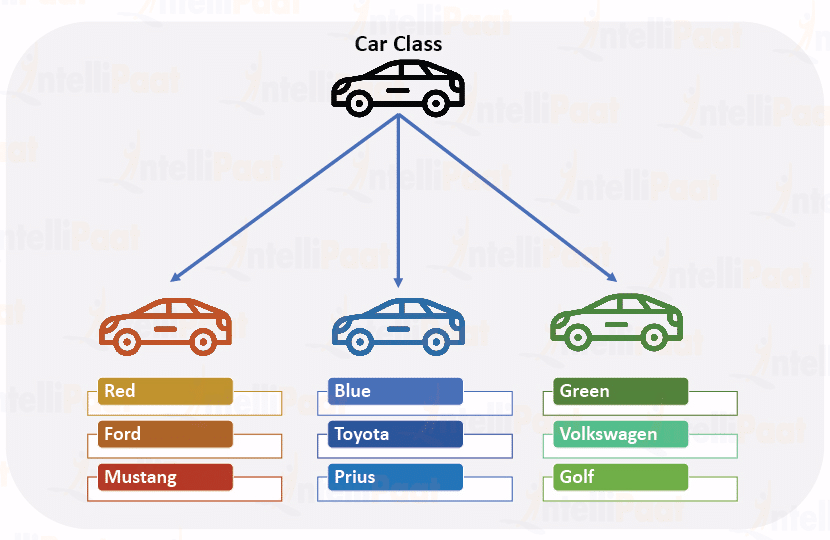

ds es un objeto, entonces podemos modificar sus elementos es un objeto, entonces podemos modificar sus elementos

In [76]:
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 903)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

### LATITUD

El vector de latitud se define de 90 a -90. Recomiendo invertir el vector y los datos (-90 a 90)

In [77]:
ds = ds.isel(lat=slice(None, None, -1))   #este método se aplica a latitud y aire
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 903)
Coordinates:
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

### LONGITUD

Lon se define de o a 360. Muchas veces necesitamos tenerlo de -180 a 180. Modifiquemos lon y air.

In [78]:
ds.coords['lon'] = ((ds.coords['lon'] + 180) % 360) - 180
ds = ds.sortby(ds.lon)
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 903)
Coordinates:
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

### CLIMATOLOGÍAS 

In [79]:
# OBTENEMOS EL PROMEDIO MESNUAL
mon_ds = ds.groupby('time.month').mean('time')
mon_ds   #NOTE Q TIME TIENE 12 timesteps

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, month: 12)
Coordinates:
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (month, lat, lon) float32 -22.54 -22.54 -22.54 ... -28.51 -28.51
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [80]:
# promedio estacional
seas_ds = ds.groupby('time.season').mean('time')
seas_ds   #n 4 timesteps  (order DJF  JJA  MAM  SON)

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, season: 4)
Coordinates:
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    air      (season, lat, lon) float32 -26.57 -26.57 -26.57 ... -17.97 -17.97
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [81]:
# obtenemos promedios anual
year_ds = ds.groupby('time.year').mean('time')
year_ds   

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, year: 76)
Coordinates:
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * year     (year) int64 1948 1949 1950 1951 1952 ... 2019 2020 2021 2022 2023
Data variables:
    air      (year, lat, lon) float32 -47.96 -47.96 -47.96 ... -26.6 -26.6 -26.6
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [82]:
# obtener la media del banco de datos completo
yearmean_ds = ds.air.mean('time')
yearmean_ds   

<xarray.DataArray 'air' (lat: 73, lon: 144)>
array([[-45.770004, -45.770004, -45.770004, ..., -45.770004, -45.770004,
        -45.770004],
       [-40.600258, -40.214283, -39.847603, ..., -41.837296, -41.415497,
        -41.00193 ],
       [-25.32635 , -24.553102, -23.889338, ..., -28.311728, -27.208448,
        -26.211786],
       ...,
       [-16.827427, -16.779493, -16.738855, ..., -16.97753 , -16.93041 ,
        -16.879002],
       [-16.95209 , -16.955069, -16.9569  , ..., -16.930376, -16.940172,
        -16.946957],
       [-16.61871 , -16.61871 , -16.61871 , ..., -16.61871 , -16.61871 ,
        -16.61871 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5

In [83]:
# obtener la sd del banco de datos completo
yearstd_ds = ds.air.std('time')
yearstd_ds   

<xarray.DataArray 'air' (lat: 73, lon: 144)>
array([[14.023036 , 14.023036 , 14.023036 , ..., 14.023036 , 14.023036 ,
        14.023036 ],
       [10.4484415, 10.373008 , 10.312323 , ..., 10.763256 , 10.644067 ,
        10.53896  ],
       [ 7.895636 ,  7.951812 ,  8.039413 , ...,  7.974192 ,  7.901746 ,
         7.8770466],
       ...,
       [12.791811 , 12.770724 , 12.75254  , ..., 12.862012 , 12.838821 ,
        12.815032 ],
       [12.934265 , 12.937753 , 12.940804 , ..., 12.918499 , 12.924832 ,
        12.929824 ],
       [12.647253 , 12.647253 , 12.647253 , ..., 12.647253 , 12.647253 ,
        12.647253 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5

PLot 

In [84]:

#necesitamos matrices lon, lat 
lon, lat = np.meshgrid(yearmean_ds.lon, yearmean_ds.lat)
lat.shape

(73, 144)

/usr/local/lib/python3.9/dist-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/usr/local/lib/python3.9/dist-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


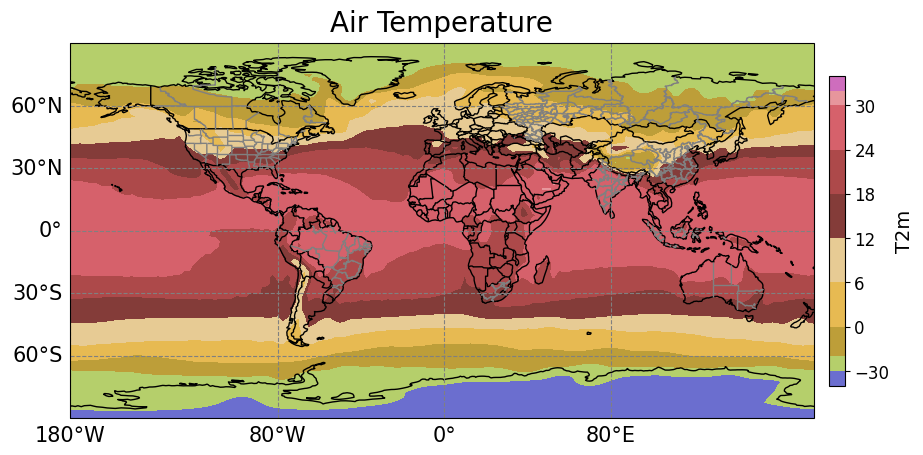

In [85]:
#Figures

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())


#plot   contourf = shaded    contour = line
im = ax.contourf(lon, lat, yearmean_ds, levels=[-60, -30, -10, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 40, 60],
                 cmap='tab20b',
                 transform=ccrs.PlateCarree())

#colocando un color        pad = largura de la paleta     fraction = altura de la paleta
cbar = plt.colorbar(im, ax=ax, pad=0.02, fraction=0.02)
cbar.set_label(label='T2m', size=14)
cbar.ax.tick_params(labelsize=12)

#Adicionando el contorno de continenetes
ax.add_feature(cfeature.COASTLINE)

#Adicionando los limites dos países 
ax.add_feature(cfeature.BORDERS, edgecolor='k', linestyle='-')

#Adicionando los limites estados
states = cfeature.NaturalEarthFeature(category='cultural',
                                      name='admin_1_states_provinces_lines',
                                      scale='50m',
                                      facecolor='none')
ax.add_feature(states, edgecolor='gray', linestyle='-')

#Adicionando el título de la figura  y movemos un poco para arriba
ax.set_title('Air Temperature', fontsize=20, y=1.01)

#Adicionando lineas de rejilla
g1 = ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', color='gray', draw_labels=True)

#Intervalo de ejes
g1.xlocator = mticker.FixedLocator([-180, -80, 0, 80, 180])
g1.xformatter = LONGITUDE_FORMATTER
g1.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
g1.yformatter = LATITUDE_FORMATTER

#Eliminación de las etiquetas superior y derecha
g1.right_labels = False
g1.top_labels = False

#Removendo os labels do topo e da direita
g1.ylabels_right = False
g1.xlabels_top = False

#Mofificando o tamanho da fonte dos labels 
g1.xlabel_style = {'size': 15, 'color': 'black'}
g1.ylabel_style = {'size': 15, 'color': 'black'}

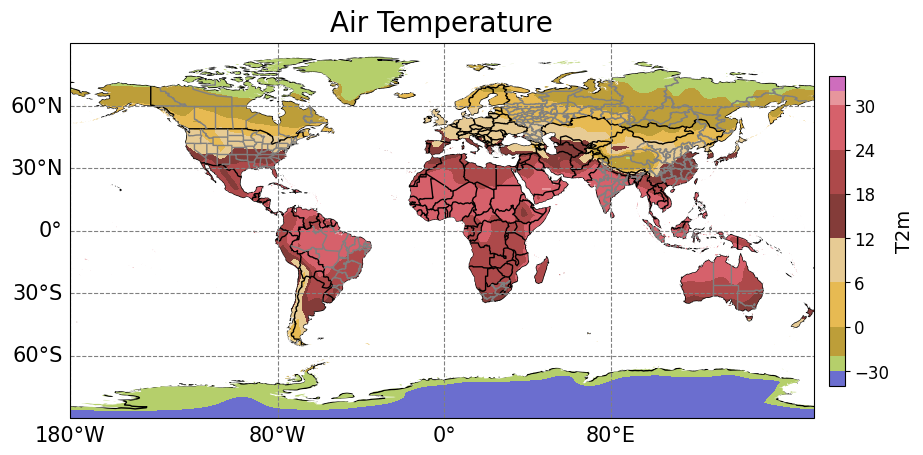

In [86]:
#Figura anterior, pero enmascarando el océano

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())


#plot
im = ax.contourf(lon, lat, yearmean_ds, levels=[-60, -30, -10, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 40, 60],
                 cmap='tab20b',
                 transform=ccrs.PlateCarree())

#Insertar un pad de barra de color = fracción de ancho de paleta = altura de paleta
cbar = plt.colorbar(im, ax=ax, pad=0.02, fraction=0.02)
cbar.set_label(label='T2m', size=14)
cbar.ax.tick_params(labelsize=12)



#Agregar el contorno de los continentes
ax.add_feature(cfeature.COASTLINE)

#Agregando los bordes de los países / también podemos definir el color de las líneas, estilo
ax.add_feature(cfeature.BORDERS, edgecolor='k', linestyle='-')

#Adición de límites estatales
states = cfeature.NaturalEarthFeature(category='cultural',
                                      name='admin_1_states_provinces_lines',
                                      scale='50m',
                                      facecolor='none')
ax.add_feature(states, edgecolor='gray', linestyle='-')

#el océano se vuelve blanco
Ocean = cfeature.NaturalEarthFeature(category='physical', 
                                     name = 'ocean',
                                     scale='50m', 
                                     edgecolor='none', 
                                     facecolor='white')
ax.add_feature(Ocean)


#Agregar el título de la figura y es cambiar el título un poco
ax.set_title('Air Temperature', fontsize=20, y=1.01)

#Agregar a líneas de cuadrícula
g1 = ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', color='gray', draw_labels=True)

#rango del eje
g1.xlocator = mticker.FixedLocator([-180, -80, 0, 80, 180])
g1.xformatter = LONGITUDE_FORMATTER
g1.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
g1.yformatter = LATITUDE_FORMATTER

#Eliminación de las etiquetas superior y derecha
g1.right_labels = False
g1.top_labels = False

#Eliminación de las etiquetas superior y derecha
g1.ylabels_right = False
g1.xlabels_top = False

#Cambiar el tamaño de fuente de las etiquetas
g1.xlabel_style = {'size': 15, 'color': 'black'}
g1.ylabel_style = {'size': 15, 'color': 'black'}




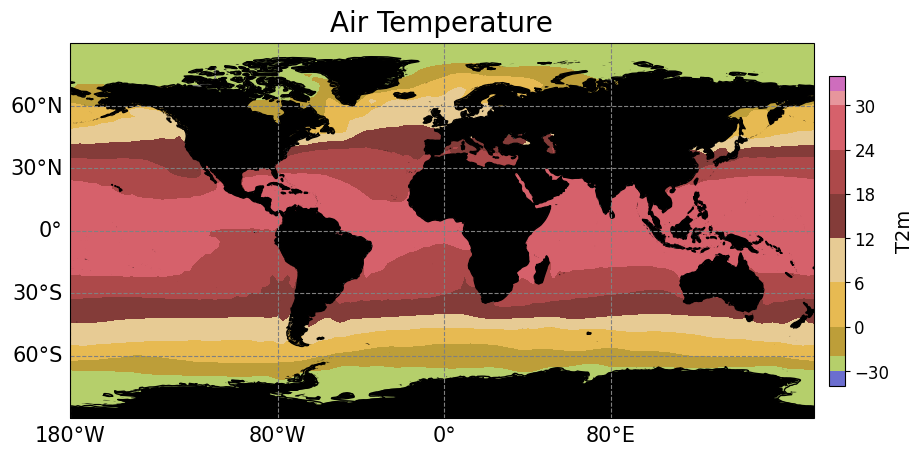

In [87]:
#Previous figure, but masking the continent

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())


#plot
im = ax.contourf(lon, lat, yearmean_ds, levels=[-60, -30, -10, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 40, 60],
                 cmap='tab20b',
                 transform=ccrs.PlateCarree())

#Insertar un pad de barra de color = fracción de ancho de paleta = altura de paleta
cbar = plt.colorbar(im, ax=ax, pad=0.02, fraction=0.02)
cbar.set_label(label='T2m', size=14)
cbar.ax.tick_params(labelsize=12)



#Agregar el contorno de los continenteses
ax.add_feature(cfeature.COASTLINE)

#Agregando los bordes de los países / también podemos definir el color de las líneas, estilo
ax.add_feature(cfeature.BORDERS, edgecolor='k', linestyle='-')

#Adición de límites estatales
states = cfeature.NaturalEarthFeature(category='cultural',
                                      name='admin_1_states_provinces_lines',
                                      scale='50m',
                                      facecolor='none')
ax.add_feature(states, edgecolor='gray', linestyle='-')

#El continente se vuelve blanco
continent = cfeature.NaturalEarthFeature(category='physical', 
                                     name = 'land',
                                     scale='50m', 
                                     edgecolor='none', 
                                     facecolor='black')
ax.add_feature(continent)


#Agregar el título de la figura y es cambiar el título un poco
ax.set_title('Air Temperature', fontsize=20, y=1.01)

#Agregar a líneas de cuadrícula
g1 = ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', color='gray', draw_labels=True)

#rango del eje
g1.xlocator = mticker.FixedLocator([-180, -80, 0, 80, 180])
g1.xformatter = LONGITUDE_FORMATTER
g1.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
g1.yformatter = LATITUDE_FORMATTER

#Eliminación de las etiquetas superior y derecha
g1.right_labels = False
g1.top_labels = False

#Eliminación de las etiquetas superior y derecha
g1.ylabels_right = False
g1.xlabels_top = False

#Cambiar el tamaño de fuente de las etiquetas
g1.xlabel_style = {'size': 15, 'color': 'black'}
g1.ylabel_style = {'size': 15, 'color': 'black'}

ANOALIAS

In [88]:
#Anomalía = mes - climatología mensual
# ene 1990 - climatología ene
at2m = ds.air.groupby('time.month') - ds.air.groupby('time.month').mean('time')
at2m.shape

(903, 73, 144)

In [89]:
at2m

<xarray.DataArray 'air' (time: 903, lat: 73, lon: 144)>
array([[[ 4.8390045 ,  4.8390045 ,  4.8390045 , ...,  4.8390045 ,
          4.8390045 ,  4.8390045 ],
        [ 4.2811985 ,  4.2215595 ,  4.1557846 , ...,  4.4585114 ,
          4.3971043 ,  4.3325405 ],
        [ 2.6981611 ,  2.5764828 ,  2.4714813 , ...,  3.1072807 ,
          2.9583178 ,  2.8253908 ],
        ...,
        [-2.4760132 , -2.4567204 , -2.4494953 , ..., -2.5634212 ,
         -2.5283833 , -2.4995556 ],
        [-3.9064655 , -3.8627872 , -3.8218727 , ..., -4.064392  ,
         -4.0080776 , -3.9579659 ],
        [-5.080536  , -5.080536  , -5.080536  , ..., -5.080536  ,
         -5.080536  , -5.080536  ]],

       [[ 2.0044785 ,  2.0044785 ,  2.0044785 , ...,  2.0044785 ,
          2.0044785 ,  2.0044785 ],
        [ 1.8898621 ,  1.8967724 ,  1.8955364 , ...,  1.8913574 ,
          1.8862343 ,  1.891161  ],
        [ 0.98526   ,  1.0101242 ,  1.0395489 , ...,  0.9741955 ,
          0.9829292 ,  0.982975  ],
...
        [ 3.558216  ,  3.6168346 ,  3.6827908 , ...,  3.3752518 ,
          3.4462185 ,  3.5014133 ],
        [ 3.2520046 ,  3.2993279 ,  3.3644753 , ...,  3.0683308 ,
          3.1294785 ,  3.1931763 ],
        [ 2.8566399 ,  2.8566399 ,  2.8566399 , ...,  2.8566399 ,
          2.8566399 ,  2.8566399 ]],

       [[ 6.751049  ,  6.751049  ,  6.751049  , ...,  6.751049  ,
          6.751049  ,  6.751049  ],
        [ 3.6694946 ,  3.6966362 ,  3.708767  , ...,  3.6378288 ,
          3.652279  ,  3.6612358 ],
        [ 1.9471073 ,  2.0260353 ,  2.0942593 , ...,  1.6436005 ,
          1.7542343 ,  1.8536739 ],
        ...,
        [ 3.222746  ,  3.282957  ,  3.3400974 , ...,  2.8961563 ,
          3.025589  ,  3.1372795 ],
        [ 1.8030205 ,  1.8612518 ,  1.917654  , ...,  1.5868378 ,
          1.6656818 ,  1.7318668 ],
        [ 1.1632919 ,  1.1632919 ,  1.1632919 , ...,  1.1632919 ,
          1.1632919 ,  1.1632919 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 5 6 7 8 9 10 11 12 1 2 3

Slicing

In [90]:
##Seleccionando solo Sudamérica
at2m_SA = at2m.sel(lat=slice(-60, 18), lon=slice(-90, -25))
at2m_SA

<xarray.DataArray 'air' (time: 903, lat: 32, lon: 27)>
array([[[ 0.23461056,  0.32138205,  0.39495134, ..., -0.01152229,
         -0.00290287,  0.01271318],
        [ 0.29072285,  0.30784178,  0.33756256, ..., -0.07835913,
         -0.06668109, -0.09093213],
        [ 0.1851387 ,  0.24468088,  0.32271814, ..., -0.05068696,
         -0.10564601, -0.21491623],
        ...,
        [-0.6745186 , -0.6975994 , -0.59970665, ..., -0.3439865 ,
         -0.12747002,  0.05503845],
        [-0.27700996, -0.22679901, -0.2879963 , ..., -0.24560356,
         -0.06291962,  0.14753151],
        [-0.24241447, -0.08362007,  0.05049515, ..., -0.29800224,
         -0.07727814,  0.1932373 ]],

       [[-0.2458663 , -0.19752884, -0.17857552, ..., -0.34733564,
         -0.39665312, -0.43124002],
        [-0.49154186, -0.4273224 , -0.3865552 , ..., -0.44619107,
         -0.45240885, -0.53453296],
        [-0.55971575, -0.49300575, -0.40371943, ..., -0.47998786,
         -0.4610834 , -0.5813923 ],
...
        [ 0.77970123,  0.57113457,  0.6386337 , ..., -0.20124817,
         -0.1573143 ,  0.28430557],
        [ 0.4890442 ,  0.46640205,  0.85132027, ..., -0.22469711,
         -0.28931236, -0.14965248],
        [ 0.12232018,  0.4465027 ,  1.0020466 , ..., -0.4513588 ,
         -0.435709  , -0.37469482]],

       [[-1.5075164 , -1.3909624 , -1.2861412 , ...,  0.41352943,
          0.41087803,  0.40154606],
        [-1.8424671 , -1.7558904 , -1.662174  , ...,  0.52347744,
          0.45491523,  0.49045396],
        [-1.9104629 , -1.844501  , -1.8176703 , ...,  0.515332  ,
          0.5383742 ,  0.7175698 ],
        ...,
        [ 0.07554245,  0.29796982,  0.6195564 , ...,  0.73646355,
          1.0291824 ,  1.292902  ],
        [ 0.3028412 ,  0.5212288 ,  0.5235443 , ...,  0.88005257,
          0.93647003,  1.0612049 ],
        [ 0.3374977 ,  0.49617577,  0.46839714, ...,  1.0466843 ,
          1.1131287 ,  1.1353741 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -60.0 -57.5 -55.0 -52.5 -50.0 ... 10.0 12.5 15.0 17.5
  * lon      (lon) float32 -90.0 -87.5 -85.0 -82.5 ... -32.5 -30.0 -27.5 -25.0
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 5 6 7 8 9 10 11 12 1 2 3

In [ ]:
Figures looping

In [91]:

#Trazado de 1 a 13 pasos de tiempo

#Necesitamos matrices de lon, lat
lon, lat = np.meshgrid(at2m_SA.lon, at2m_SA.lat)
lat.shape

(32, 27)

In [92]:
at2m_SA.shape

(903, 32, 27)

/usr/local/lib/python3.9/dist-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/usr/local/lib/python3.9/dist-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
<ipython-input-93-4977baca2a6c>:58: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.savefig(copied_path + 't2m_' + np.str(i) + ".png", dpi=300)


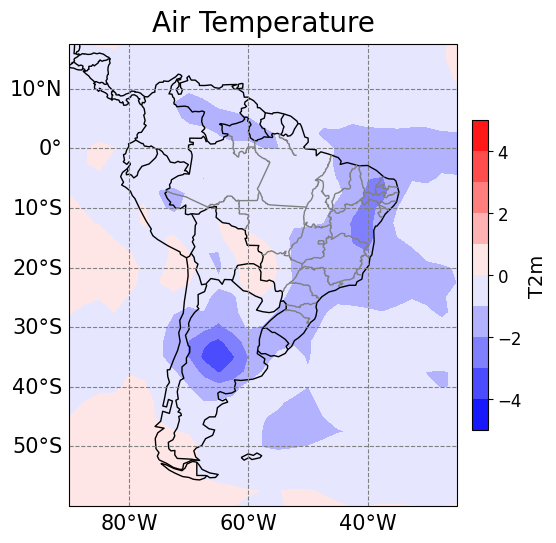

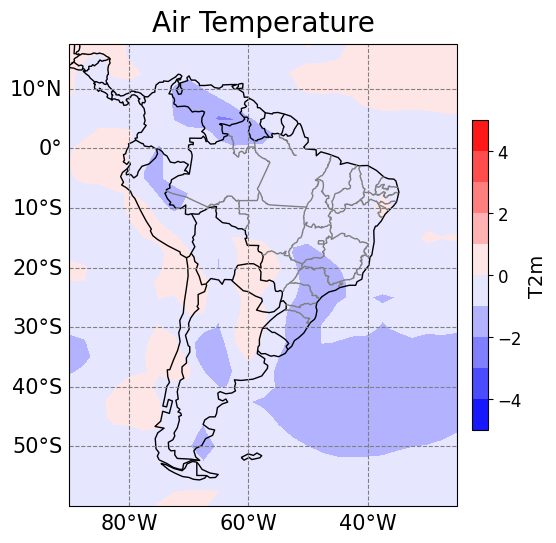

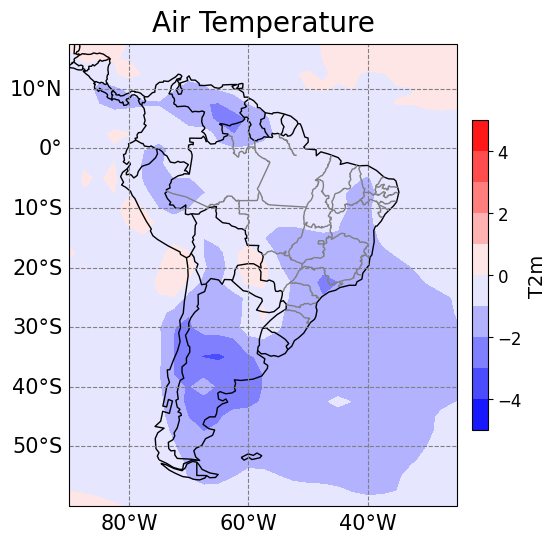

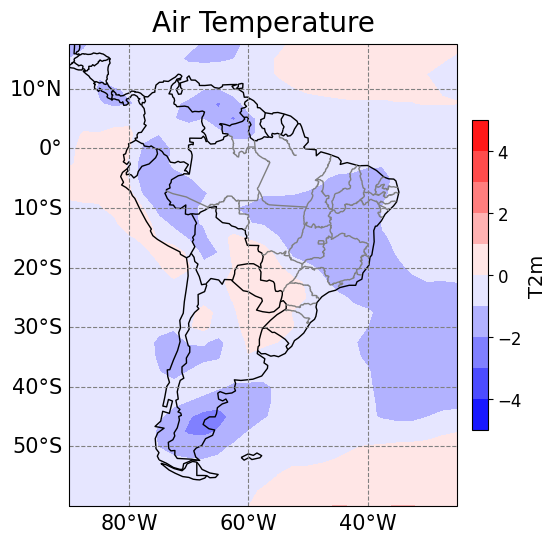

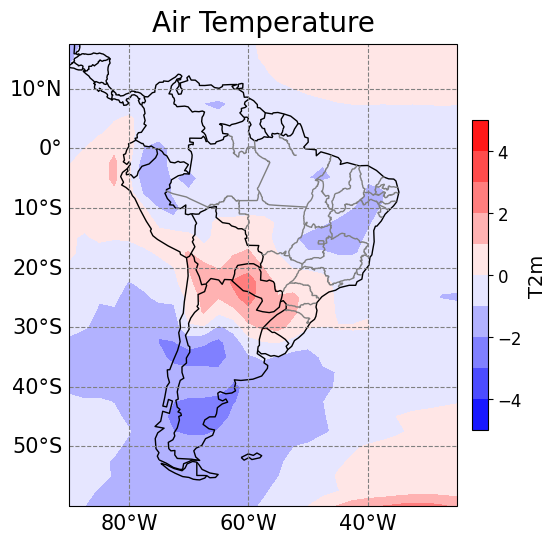

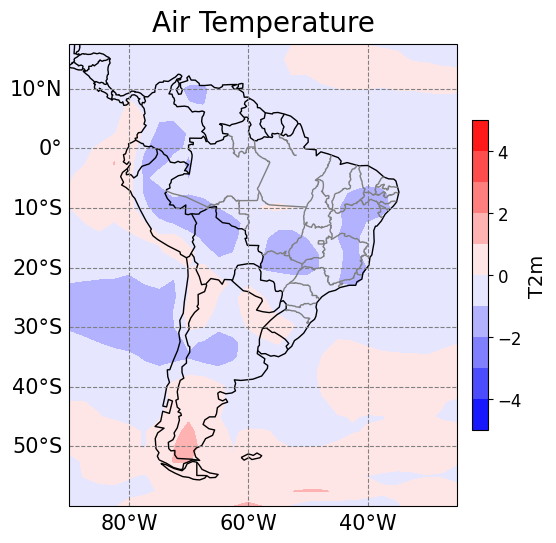

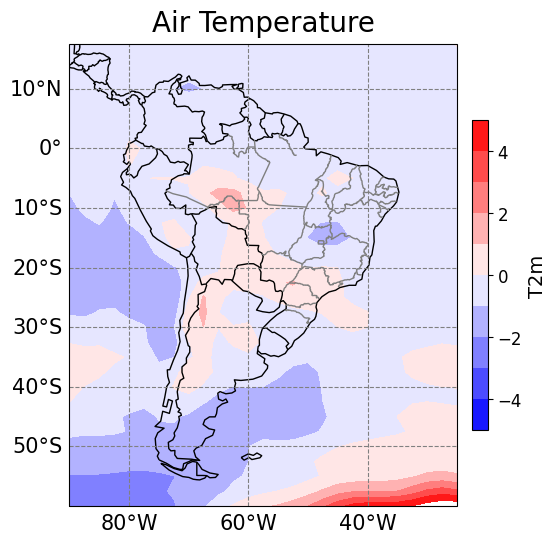

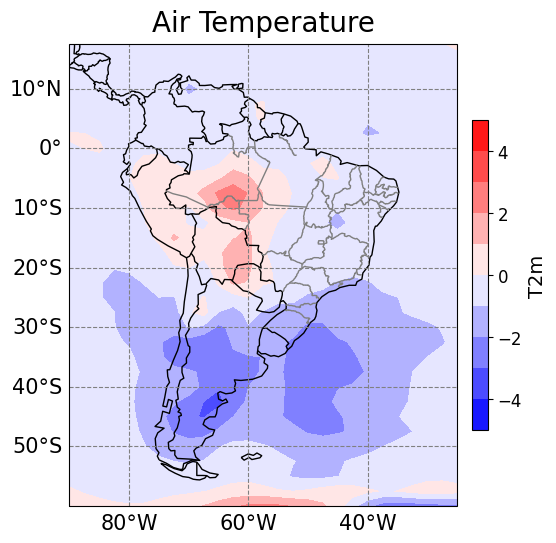

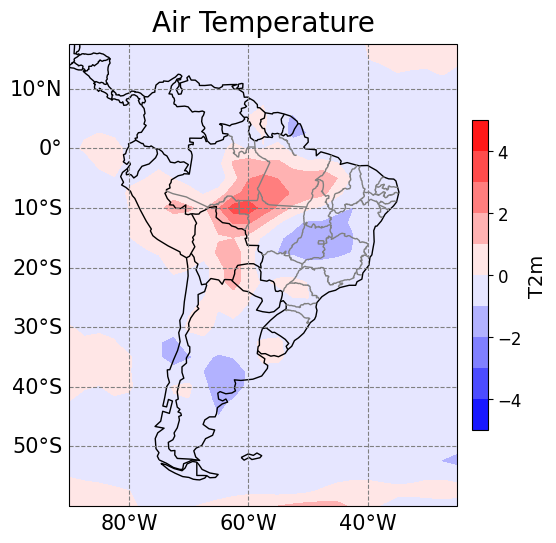

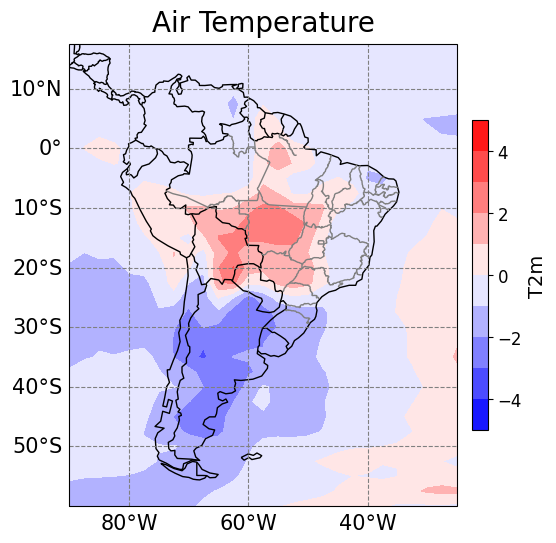

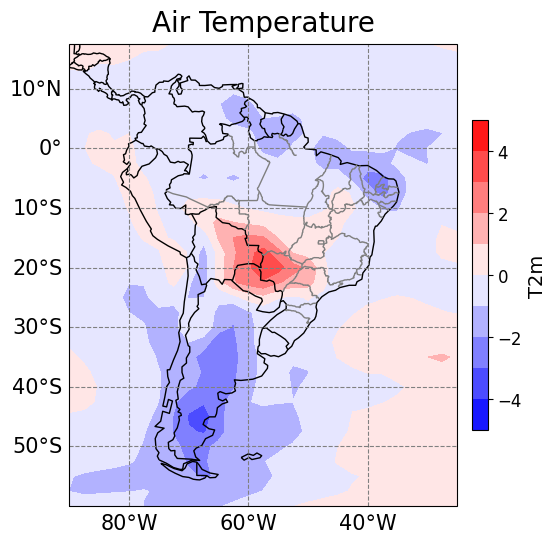

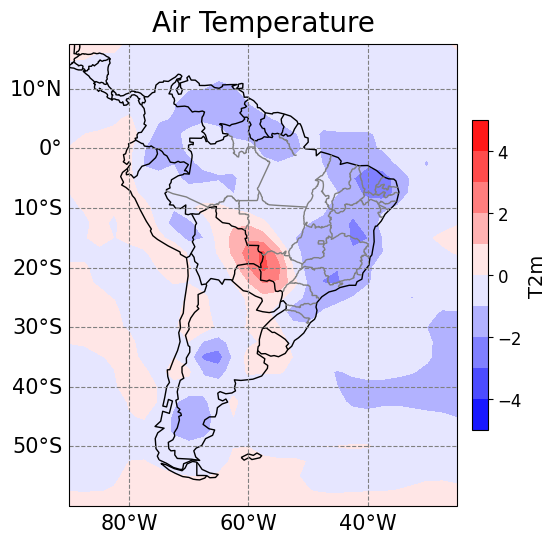

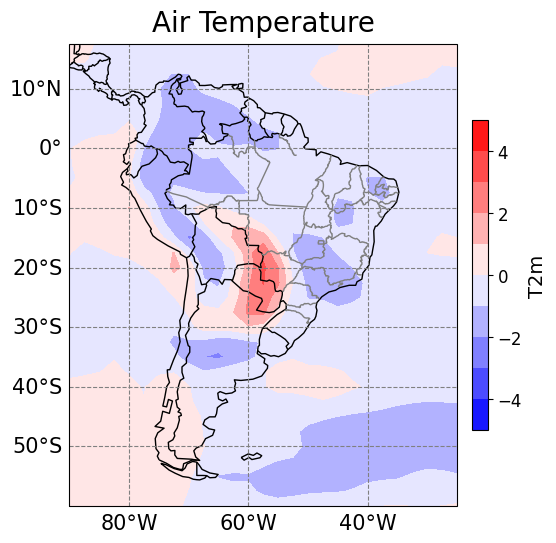

In [93]:
#Figures

le = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for i in le:

  fig = plt.figure(figsize=(10, 6))
  ax = fig.add_subplot(111, projection=ccrs.PlateCarree())


#plot
  im = ax.contourf(lon, lat, at2m_SA[i,:,:], levels=[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
                  cmap='bwr',
                  transform=ccrs.PlateCarree())

#Insertar un pad de barra de color = fracción de ancho de paleta = altura de paleta
  cbar = plt.colorbar(im, ax=ax, pad=0.02, fraction=0.02)
  cbar.set_label(label='T2m', size=14)
  cbar.ax.tick_params(labelsize=12)

#Agregar el contorno de los continentes
  ax.add_feature(cfeature.COASTLINE)

#Agregando los bordes de los países / también podemos definir el color de las líneas, estilo
  ax.add_feature(cfeature.BORDERS, edgecolor='k', linestyle='-')

#Adición de límites estatales
  states = cfeature.NaturalEarthFeature(category='cultural',
                                      name='admin_1_states_provinces_lines',
                                      scale='50m',
                                      facecolor='none')
  ax.add_feature(states, edgecolor='gray', linestyle='-')

#Agregar el título de la figura y es cambiar el título un poco
  ax.set_title('Air Temperature', fontsize=20, y=1.01)

#Agregar a líneas de cuadrícula
  g1 = ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', color='gray', draw_labels=True)

#rango del eje
  g1.xlocator = mticker.FixedLocator([-80, -60, -40, -25])
  g1.xformatter = LONGITUDE_FORMATTER
  g1.ylocator = mticker.FixedLocator([-60, -50, -40, -30, -20, -10, 0, 10])
  g1.yformatter = LATITUDE_FORMATTER

#Eliminación de las etiquetas superior y derecha
  g1.right_labels = False
  g1.top_labels = False

#Eliminación de las etiquetas superior y derecha
  g1.ylabels_right = False
  g1.xlabels_top = False

#Modificar el tamaño de fuente de las etiquetas
  g1.xlabel_style = {'size': 15, 'color': 'black'}
  g1.ylabel_style = {'size': 15, 'color': 'black'}

  plt.savefig(copied_path + 't2m_' + np.str(i) + ".png", dpi=300)

### CREANDO UNA SERIE TEMPORAL ANOMALÍA PARA EL SUR DE MINAS GERAIS

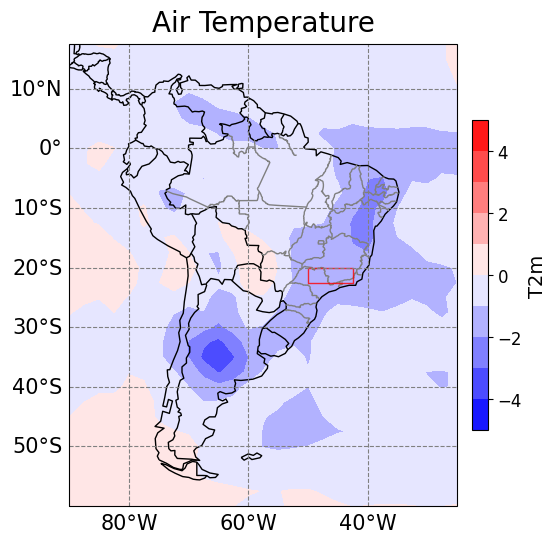

In [94]:
import matplotlib.patches as patches
from shapely.geometry.polygon import Polygon
import cartopy
import cartopy.feature as ccrc
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely import geometry
from shapely.geometry.polygon import LinearRing

#Definiendo el area

#Figures

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())


#plot
im = ax.contourf(lon, lat, at2m_SA[0,:,:], levels=[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
                  cmap='bwr',
                  transform=ccrs.PlateCarree())

#Insertar un pad de barra de color = fracción de ancho de paleta = altura de paleta
cbar = plt.colorbar(im, ax=ax, pad=0.02, fraction=0.02)
cbar.set_label(label='T2m', size=14)
cbar.ax.tick_params(labelsize=12)

#Agregar el contorno de los continentes
ax.add_feature(cfeature.COASTLINE)

#Agregando los bordes de los países / también podemos definir el color de las líneas, estilo
ax.add_feature(cfeature.BORDERS, edgecolor='k', linestyle='-')

#Adición de límites estatales
states = cfeature.NaturalEarthFeature(category='cultural',
                                      name='admin_1_states_provinces_lines',
                                      scale='50m',
                                      facecolor='none')
ax.add_feature(states, edgecolor='gray', linestyle='-')

#Agregar el título de la figura y es cambiar el título un poco
ax.set_title('Air Temperature', fontsize=20, y=1.01)


#Agregar  líneas de cuadrícula
g1 = ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', color='gray', draw_labels=True)

#Intervalo de los ejes
g1.xlocator = mticker.FixedLocator([-80, -60, -40, -25])
g1.xformatter = LONGITUDE_FORMATTER
g1.ylocator = mticker.FixedLocator([-60, -50, -40, -30, -20, -10, 0, 10])
g1.yformatter = LATITUDE_FORMATTER

#Eliminación de las etiquetas superior y derecha
g1.right_labels = False
g1.top_labels = False

#Eliminación de las etiquetas superior y derecha
g1.ylabels_right = False
g1.xlabels_top = False

#Cambiar el tamaño de fuente de las etiquetas
g1.xlabel_style = {'size': 15, 'color': 'black'}
g1.ylabel_style = {'size': 15, 'color': 'black'}


# añadiendo una caja
lonmin = -50
lonmax = -42.5
latmin = -22.5
latmax = -20

geom = geometry.box(minx=lonmin,maxx=lonmax,miny=latmin,maxy=latmax)
ax.add_geometries([geom], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='red', alpha=0.8)

#plt.savefig(copied_path + 'box_t2m.png', dpi=300)



In [95]:

#seleccionando solo el sur de MInas Gerais
at2m_SMG = at2m.sel(lat=slice(-22.5, -20), lon=slice(-50, -42.5))
at2m_SMG

<xarray.DataArray 'air' (time: 903, lat: 2, lon: 4)>
array([[[-1.724781  , -1.8744965 , -1.7695198 , -1.7188454 ],
        [-1.7329693 , -1.6931572 , -1.6932812 , -1.8118973 ]],

       [[-1.4435425 , -1.6232357 , -1.2219563 , -0.8483906 ],
        [-1.5476265 , -1.5205059 , -1.0564842 , -0.7343731 ]],

       [[-1.8133907 , -2.139244  , -2.027563  , -1.8076439 ],
        [-2.0379944 , -1.8966427 , -1.7012634 , -1.6492424 ]],

       ...,

       [[-0.21092796, -0.13435745, -0.0372715 ,  0.04968071],
        [-0.2741127 ,  0.14651108,  0.47363472,  0.5211506 ]],

       [[-0.24363708,  0.12704468,  0.631094  ,  0.8771305 ],
        [ 0.15136337,  0.6394787 ,  1.1347103 ,  1.3124657 ]],

       [[ 0.66347504,  0.70751   ,  0.7146435 ,  0.7839432 ],
        [ 0.5951214 ,  0.8607807 ,  1.165493  ,  1.1473045 ]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -22.5 -20.0
  * lon      (lon) float32 -50.0 -47.5 -45.0 -42.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 5 6 7 8 9 10 11 12 1 2 3

In [96]:
#Calcular la media del area
at2m_SMG_area = at2m_SMG.mean(("lon","lat"))   #2 ((  ))       It does not work in this way ( )

In [97]:
at2m_SMG_area

<xarray.DataArray 'air' (time: 903)>
array([-1.75236845e+00, -1.24951434e+00, -1.88412309e+00, -1.04584837e+00,
       -2.12849140e-01, -9.90864038e-01,  9.26043987e-02, -7.44142532e-01,
       -4.84073400e-01,  1.70788050e-01,  5.75969219e-02, -1.74777174e+00,
       -1.37644148e+00, -1.25025678e+00, -9.21704292e-01, -1.26164007e+00,
       -6.54179811e-01,  1.08692479e+00, -1.18949068e+00, -3.57124567e-01,
       -3.19898129e-02,  2.08774805e-01, -9.19029474e-01, -4.81644630e-01,
       -1.13474846e+00, -7.18515873e-01, -7.25373745e-01,  2.25358009e-01,
        7.82107830e-01,  1.47759676e-01, -2.87556410e-01,  6.44811153e-01,
       -1.19509697e-02,  3.35504293e-01, -1.14677691e+00, -1.41176486e+00,
       -5.45717716e-01, -7.80479670e-01, -3.29043627e-01, -1.93697071e+00,
       -4.35953856e-01, -9.98031974e-01, -1.55122530e+00, -2.11869502e+00,
       -1.18302989e+00, -1.41606474e+00, -9.05036926e-04, -8.84264946e-01,
       -3.64385605e-01, -1.59128428e-01, -2.21139669e-01, -6.90141439e-01,
        5.12218475e-02,  3.98715973e-01,  9.66998100e-01,  1.51009250e+00,
       -1.18115592e+00,  1.51836395e-01, -9.07278299e-01, -6.43861532e-01,
       -5.81403255e-01, -2.42889166e-01, -1.91020012e-01, -4.97724056e-01,
        7.25938559e-01, -3.05614948e-01, -6.50418043e-01,  5.04163980e-01,
        2.53546524e+00,  1.53691053e-01, -6.61535263e-02, -4.57128048e-01,
       -2.47489929e-01, -1.89051390e-01, -2.19473839e-02,  2.58693695e-01,
        1.51422024e-01,  5.74174166e-01,  8.78933430e-01,  3.66382360e-01,
...
        1.63354397e-01,  1.76563740e-01,  2.50310421e-01,  7.69855738e-01,
        1.02677059e+00,  6.15753412e-01,  4.60601807e-01,  6.65205717e-01,
        9.66088772e-01,  5.09749651e-01, -8.65669012e-01, -1.51670456e-01,
        3.15854788e-01,  1.85387850e+00,  2.06041574e-01,  6.75496817e-01,
        7.77677536e-01, -2.22526550e-01,  1.31644678e+00,  2.89367199e-01,
        3.28273773e-02,  9.23600674e-01,  9.54291582e-01, -9.22334671e-01,
       -5.24354935e-01, -9.62734222e-03,  1.99999094e-01,  9.23887014e-01,
        1.70438886e+00,  8.76582623e-01,  7.35499859e-01,  1.48561740e+00,
        1.52839255e+00,  1.01006222e+00, -7.26253986e-02, -1.81005716e-01,
        1.43574739e+00,  9.59827185e-01,  9.15935755e-01,  5.58061123e-01,
        1.01769853e+00,  3.56980562e-01, -1.40102386e-01,  2.31034279e-01,
       -4.81993198e-01,  1.30932999e+00,  1.16225266e+00, -6.87052011e-01,
        1.84564447e+00,  1.33674407e+00,  3.63543034e-02,  9.63805199e-01,
        7.67094612e-01,  7.92608261e-02,  9.79150534e-01, -3.27715635e-01,
        6.80407524e-01, -2.31500149e-01, -1.83038819e+00,  2.39961624e-01,
        1.94272780e+00, -5.88353634e-01,  3.29580307e-01, -1.45206451e-02,
        5.87957382e-01,  2.30488539e-01,  1.18942952e+00,  9.17910814e-01,
       -8.17274809e-01, -1.52959347e-01,  1.06890368e+00, -8.12256098e-01,
       -1.45300031e+00,  2.37650633e-01, -8.91459227e-01, -2.23836899e-02,
        6.67884350e-02,  5.78706264e-01,  8.29783916e-01], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 5 6 7 8 9 10 11 12 1 2 3

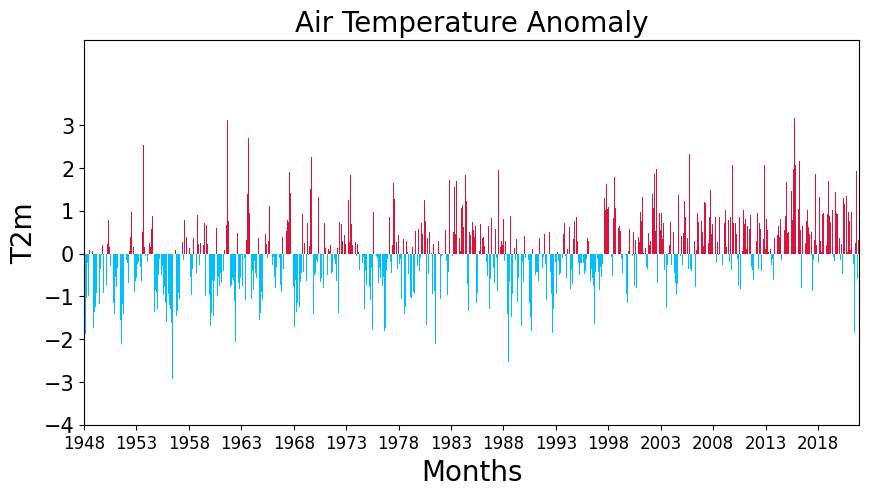

In [98]:
#Figure

nx = np.arange(0,903)

fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlim([0, 887])  #limites del ejex
#ax.set_xticks(at2m_SMG_area)  
ax.set_xticks(np.arange(0, 888, 60))
ax.set_xticklabels(np.arange(1948, 2021, 5)) 
ax.xaxis.set_tick_params(labelsize=12)  #tamaño de la fuente

ax.set_ylim([-4, 5]) #limites del eje y
ax.set_yticks(np.arange(-4, 4, 1))
#ax.set_yticklabels(np.arange(-4, 4, 1)) 
ax.yaxis.set_tick_params(labelsize=15)  #tamaño de la fuente

ax.set_title("Air Temperature Anomaly",fontsize=20)
ax.set_xlabel("Months",fontsize=20)
ax.set_ylabel("T2m",fontsize=20)

ax.bar(nx,at2m_SMG_area, color=np.where(at2m_SMG_area[:] < 0, 'deepskyblue', 'crimson'),)

plt.show()